## Remaining issues

- The dataset reduction and file saving is *good* but could be tidied up with a dedicated pass
- The annotations file process is not documented
- Compare the "dent" in the March 10 2021 noon profile with that of 26 JUN 2018. The similarity suggests that there is more to be done on the NPQ flagging; e.g. using red ink in between the 40m peaks.
- Obviously the content here would be amenable to some tidying up.

In [1]:
# Some example code is given (commented out) to indicate related operations.
#
# Code to show the first five qc results flags for FDOM/CDOM: 29, as seen above as well. 
# D1.fluorometric_cdom_qc_results[0:5]
# 
# Example of removing spike values using a threshold of 100; uses the .where() method.
# Dprime = D1.where(D1.fdom > 100., drop=True)


In [ ]:
# Code demonstrating conversion from UTC to local time
#   Seven hours corresponds to Oregon state UTC shift during daylight savings.
#   p[][] is a pandas DataFrame of profiler Timestamps.
tl = str(p['ascent_start'][603].to_datetime64() + td64(-7, 'h'))
print(tl[0:10] + ' ' + tl[11:16])

- One might explain HITL `annotations.csv` source
    - Mike: https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find
    - Mike: https://ooinet.oceanobservatories.org/api/m2m/12580/anno/find?refdes=RS03AXBS-LJ03A-05-HPIESA301&beginDT=1391865279000&endDT=1659393179000

In [ ]:
# Using list to focus on particular columns of a pandas dataframe
#   Also addresses text truncation
#   Note can select a single row using annot.iloc[22][etcetera]

pd.set_option('display.max_colwidth', 0)
print(annot[22:23][['subsite','annotation']])
print(annot[29:30][['subsite','annotation']])

In [ ]:
# Examine only a particular column of the annotation data frame
annot['beginDate'][0:4]

In [ ]:
# matplotlib stipulate a font

# font = {'family': 'serif',
#         'color':  'black',
#         'weight': 'normal',
#         'size': 12,
#         }
# plt.xlabel('time (s)', fontdict=font)
# plt.ylabel('voltage (mV)', fontdict=font)



In [ ]:
# Use the dataframe name on a line by itself to inspect the full annotation table, as in:
# annot
#
# Part 6 below uses data from June 14 2019, prior to annual maintenance. To further illustrate checking HITL annotations, here is an 
# annotation for later in 2019: June 24 -- July 12 by M.Vardaro.

# ...I suspect this has not been verified...

annot['annotation'][29]

In [2]:
# Not very illustrative charts of particulate and total backscatter removed.
# Note use of 'passing along' the XArray plot result to the fig for further mods

In [4]:
# fig=DB.particulate.plot(ylim=(0.0, 0.02))[0]
# fig.set(color='black')

In [ ]:
# fig=DB.backscatter.plot(ylim=(0.0, 0.02))[0]
# fig.set(color='blue')

In [ ]:
# fig=DB.seawater_scattering_coefficient.plot()[0]
# fig.set(color='red')

# 2019 section

Copied blankly; no finesse. Some remarks retained in DQGN. 

Following cell: Il faut.

### 2019


Date of interest: June 14, 2019


- [Green 'Downloads'; Deployment 0006, THREDDS catalog, choose Dataset](http://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html)
    - Opens a new browser tab. As described above: Identify the desired download
        - In this case [deployment0006 ... FLORTD101 ... 20190614 ...nc](https://thredds.dataexplorer.oceanobservatories.org/thredds/catalog/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/catalog.html?dataset=ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0006_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20190410T120000.534756-20190614T051241.816166.nc)
        - [Use the HTTPServer link](/thredds/fileServer/ooigoldcopy/public/RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record/deployment0006_RS01SBPS-SF01A-3A-FLORTD101-streamed-flort_d_data_record_20190410T120000.534756-20190614T051241.816166.nc)


In [6]:
# Import helper code, verify Python 
from DataQualityGuideModule import *
print('\nJupyter running Python {}'.format(sys.version_info[0]))


Jupyter running Python 3


# 2019

This is the first attempt at the 
Figure 6 'Discrete data comparative'. Deprecated in favor of the 2018 try that follows below. 

Source: [**Notebooks** folder, 'Discrete Comparison' IPython notebook](https://github.com/robfatland/ocean/blob/2e4019439f9b0148457c20107b11514a0f0b916b/Notebooks/Ocean%2001%20B2%20Discrete%20Comparison.ipynb)


## Discrete data: Rosette casts during maintenance cruises

- Regional Cabled Array annual service cruises ("VISIONS" cruises) permit CTD casts near instrument sites
- In the case of this notebook we are interested in casts near the Oregon Slope Base (OSB) shallow profiler (SP)
- Niskin bottles are usually triggered on ascent ('upcast') at some sequence of depths
    - The water samples returned to the ship in this manner are 'discrete samples'
    - Casts typically take ~1 hour to complete
- Also attached to the rosette are sensors that operate continuously, typically ~1 measurement per second
    - Particularly a fluorometer which will be the basis for comparison to the shallow profiler fluorometer
    - The upcast fluorometer data is intentionally segmented
        - The segments correspond in time to the Niskin bottle triggers
        - The continuous fluorometer data is also available
- Discrete summary data files (niskin bottle timing) are CSV tables 
    - These are available from a dedicated Server called 'Alfresco'. 
    - They include rosette fluorometer data that appears discrete...
        - ...but in fact is excerpted from continuous data 
- Get data from the OOI 'Alfresco' server
    * [Alfresco browse site](https://alfresco.oceanobservatories.org/alfresco/faces/jsp/browse/browse.jsp)
    * Navigate: Cabled array > Cruise data > (year of choice) > Ship Data > Water Sampling
    * Example: (year of choice) = 2021 is folder **Cabled-12_TN393_2021-07-30**
        * TN refers to the ship: Thompson. Atlantis = AT; Revelle = RR; Sikuliaq = SKQ (2016 cruise)
        * 393 refers to the cruise number
            * Cabled-12 indicates the OOI Regional Cabled Array; where 12 is simply an index number (by year)
            * For the OOI cabled array the annual cruise uses Newport OR as the base of operations
            * The cruise consists of a series of sorties or 'legs', each typically 5-10 days
            * The provided date 2021-07-30 indicates the year and approximate date of the cruise start
    * In the Water Sampling folder there are two files of interest
        * **Cabled-12_TN393_Discrete_Summary-README.pdf** is a guide to deciphering the data, particularly ephemeris flags
        * **Cabled-12_TN393_Discrete_Summary.csv** is a tabular data file 
            * This file is the **Discrete Summary** of interest
            * It summarizes cast sample data and synchronous continuous sensor data; see below
- Additional notes
    - Samples are most commonly taken by a [rosette](https://www.whoi.edu/what-we-do/explore/instruments/instruments-sensors-samplers/rosette-sampler/)
    - A Remotely Operated Vehicle (ROV) can also be used as a Niskin bottle framework
    - Other types of continuous sensor data from casts include seawater conductivity, temperature, and depth
    - Notes on abbreviations found in the OOI system and data filenames    
        - Cast reference site: **`SP`** is Shallow Profiler station. Cast location is stated relative; but the cast might go much deeper than 200 meters.
        - Cast sequence: **`CTD-005`** is a CTD cast with index (skips are common)
        - Cast location: **`500m SW`** indicates an offset southwest (SW) from the station position
    - The repo folder **`DiscreteSummaries`** contains:
        - Tabular data (**`.csv`**) for 2015 - 2021
        - README metadata (**`.pdf`**) for 2015 - 2021
- VISIONS cruise casts for Oregon Slope Base Shallow Profiler
    - These cast dates are listed in relation to end-of-deployment 'SP stop' times.
    - Comparison of "start of deployment" SP data with cast data is not shown here.
    - 2014--2017 Casts: None
    - 2018
        - OSB SP, CTD-002, 2018-06-26T20:23Z, 500m W
            - SP deployed Aug 4, 2017 through Jun 24, 2018 02:00Z
                - The cast above on June 26 is 2 days 18 hrs after SP stop
        - OSB SP, CTD-006, 2018-07-10T20:46Z, 250m W
        - OSB SP, CTD-008, 2018-07-10T22:44Z, 500m W
            - These two casts apparently ran in succession
            - SP deployed "briefly" Jun 24, 2018 through Jul 9, 2018 12:00Z
                - The two casts above on July 10 are 34 hours after this brief SP deployment
    - 2019
        - OSB SP, CTD-006, 2019-06-14T11:24Z,  250m W
            - SP deployed Jul 9, 2018 through Jun 14, 2019 05:26Z
                - The cast above on June 14 is 6 hours after SP stop
        - OSB SP, CTD-010, 2019-06-27T19:38Z,  250m W
    - 2020
        - OSB SP, CTD-001, 2020-08-03T15:18Z,    0m
            - SP deployed Jun 14, 2019 through Aug 2, 2020 19:41Z
                - The cast above on Aug 3 is 19 hours after SP stop
        - OSB SP, CTD-006, 2020-08-11T04:28Z, 1300m NE
        - OSB SP, CTD-007, 2020-08-11T05:48Z, 1300m NE
    - 2021
        - OSB SP, CTD-005, 2021-08-06T01:44Z, 500m SW
            - Aug 3, 2020 through Aug 4, 2021 20:20Z
                - The cast above on Aug 6 is 30 hours after SP stop
                
Based on this time sequence we proceed to compare 2019 last clean SP ascent with cast CTD-006 on June 14.

In [7]:
# Read the Discrete Summary (CSV) table for Regional Cabled Array 2019
DiscSumm = pd.read_csv('./DiscreteSummaries/RCA2019_AT_DiscSumm.csv')
# DiscSumm.shape gives 145 rows, 80 columns

# The 80 columns have header keys in the first row, printed below
#   Only the CTD-006 cast rows are used here. There are 17 with depths varying from 220m to 11m.
#   There is no direct correspondence to the FLORT sensor names.

DS6 = DiscSumm[DiscSumm["Cast"] == "CTD-006"]
DS6.keys()

Index(['Cruise', 'Station', 'Target Asset', 'Start Latitude [degrees]',
       'Start Longitude [degrees]', 'Start Time [UTC]', 'Cast', 'Cast Flag',
       'Bottom Depth at Start Position [m]', 'CTD File', 'CTD File Flag',
       'Niskin/Bottle Position', 'Niskin Flag',
       'CTD Bottle Closure Time [UTC]', 'CTD Pressure [db]',
       'CTD Pressure Flag', 'CTD Depth [m]', 'CTD Latitude [deg]',
       'CTD Longitude [deg]', 'CTD Temperature 1 [deg C]',
       'CTD Temperature 1 Flag', 'CTD Temperature 2 [deg C]',
       'CTD Temperature 2 Flag', 'CTD Conductivity 1 [S/m]',
       'CTD Conductivity 1 Flag', 'CTD Conductivity 2 [S/m]',
       'CTD Conductivity 2 Flag', 'CTD Salinity 1 [psu]',
       'CTD Salinity 2 [psu]', 'CTD Oxygen [mL/L]', 'CTD Oxygen Flag',
       'CTD Oxygen Saturation [mL/L]', 'CTD Fluorescence [mg/m^3]',
       'CTD Fluorescence Flag', 'CTD Beam Attenuation [1/m]',
       'CTD Beam Transmission [%]', 'CTD Transmissometer Flag', 'CTD pH',
       'CTD pH Flag', 'D

In [8]:
# This code excerpts several columns of interest from the Discrete Summary table for cast 6

c6_depth           = DS6["CTD Depth [m]"]                             # runs 200 ... 11 meters
c6_fluor           = DS6["CTD Fluorescence [mg/m^3]"]                 # 
c6_fluor_flag      = DS6["CTD Fluorescence Flag"]                     # for all: flags 2 and 6 set, flag 7 for good discrete samples
c6_beam_atten      = DS6["CTD Beam Attenuation [1/m]"]
c6_beam_trans      = DS6["CTD Beam Transmission [%]"]
c6_trans_flag      = DS6["CTD Transmissometer Flag"]
c6_chlor           = DS6["Discrete Chlorophyll [ug/L]"]
c6_phaeo           = DS6["Discrete Phaeopigment [ug/L]"]
c6_disc_fluor_flag = DS6["Discrete Fluorescence Flag"]
c6_disc_fluor_repl = DS6["Discrete Fluorescence Replicate Flag"]

In [9]:
# There appear to be 17 discrete samples, triggered at the following depths (meters)
print(c6_depth)

18    219.896
19    219.975
20    200.163
21    179.892
22    161.044
23    141.270
24    121.243
25    100.224
26     81.152
27     60.165
28     60.238
29     40.457
30     40.365
31     20.680
32     20.627
33     11.181
34     11.181
Name: CTD Depth [m], dtype: float64


In [10]:
# Summary of valid data for five data types
#
# Contain data at all 17 keys/depths: c6_fluor, c6_beam_atten, c6_beam_trans
# Contain data at good_discrete_keys[] only: c6_phaeo ~0.1, c6_chlor ~.5, 
# Flag indicates data are ok at good_discrete_keys[]: c6_disc_fluor_flag, c6_disc_fluor_repl
#
# How this breaks down:
# 'CTD' data (continuous sensors) are usable for the entire upcast
# 'Discrete' (water sample) data are usable for only 5 of the 17 discrete rows for CTD 006.
all_keys = list(range(18, 35))
good_discrete_keys = [25, 27, 28, 31, 32]
for i in good_discrete_keys: print(i, c6_chlor[i], c6_depth[i])
print("\nexample of no available data: ", c6_chlor[18])

25 0.0652 100.224
27 0.8852 60.165
28 0.9125 60.238
31 0.2398 20.68
32 0.2433 20.627

example of no available data:  -9999999.0


In [11]:
# This code isolates depths and sensors for overlay/comparison on the Shallow Profiler charts below
disc_depth, disc_phaeo, disc_chlor, ctd_depth, ctd_atten = [], [], [], [], []
for i in good_discrete_keys:
    disc_depth.append(c6_depth[i])
    disc_phaeo.append(c6_phaeo[i])
    disc_chlor.append(c6_chlor[i])
for i in all_keys:
    ctd_depth.append(c6_depth[i])
    ctd_atten.append(c6_beam_atten[i])

In [12]:
# Example code for 2018 (not used further here)
#
# D2018 = xr.open_dataset('../data/rca/fluor/osb/2018/flort_fullres.nc')
# D2018 = D2018.swap_dims({'obs':'time'}) 
# print('Number of data values: ', len(D2018.time)) gives 1029224 samples
# D2018 = D2018.rename( {'fluorometric_cdom':          'fdom',
#                        'fluorometric_chlorophyll_a': 'chlora',
#                        'optical_backscatter':        'backscatter'})
# print(D2018.time[0], D2018.time[-1]) provides: 2018-06-24T16:50 through 2018-07-09T00:13, 15 days
# D2018

In [13]:
# This code reads and formats the Shallow Profiler dataset for June 2019
#   The procedure is much the same as the preceding, condensed into this notebook cell.

D2019 = xr.open_dataset('../data/rca/fluor/osb/2019/flort_fullres.nc')                # full resolution data
D2019 = D2019.swap_dims({'obs':'time'})
print('Number of source data values: ', len(D2019.time))
D2019 = D2019.dropna('time')
print('D number of data values after dropping NaNs: ', len(D2019.time))               # 4.6 million observations

D2019 = D2019.rename( {'fluorometric_cdom':          'fdom',
                       'fluorometric_chlorophyll_a': 'chlora',
                       'optical_backscatter':        'backscatter'})                  # simplified names

# print(D2019.time[0], D2019.time[-1]) yields: 
#       2019-04-10T12:00 through 2019-06-14T05:12, about 64 days.
# Here we are interested in the very last profile, just prior to a CTD cast.

d2019 = D2019.sel(time=slice(dt64('2019-06-14 02:40'), dt64('2019-06-14 04:40')))     # two hour time slice spanning a profile (ascent + descent)

print('Data value count for final profile of deployment: ', len(d2019.time))          # 6000 samples: one sample every 1.2 seconds

d2019A = d2019.where(d2019.fluorometric_chlorophyll_a_qc_results % 2, drop=True)      # qc_results flag applied
d2019B = d2019.where(d2019.optical_backscatter_qc_results % 2,        drop=True)
d2019C = d2019.where(d2019.fluorometric_cdom_qc_results % 2,          drop=True)

# Drop all Data Variables except those of interest ('chlora' and so on)
d2019A = d2019A[['chlora']]                         
d2019B = d2019B[['backscatter', 'seawater_scattering_coefficient']]
d2019C = d2019C[['fdom']]                                                             # breakout 3 datasets: d2019A, B, C ~ chlor-a, bb700, fdom

print('Data sizes for source data and post-qc-discards for chlora, backscatter and fdom:', 
      len(d2019.time), '->', len(d2019A.time), ';', len(d2019B.time), ';', len(d2019C.time))

Number of source data values:  4609190
D number of data values after dropping NaNs:  4609189
Data value count for final profile of deployment:  6000
Data sizes for source data and post-qc-discards for chlora, backscatter and fdom: 6000 -> 4594 ; 6000 ; 6000


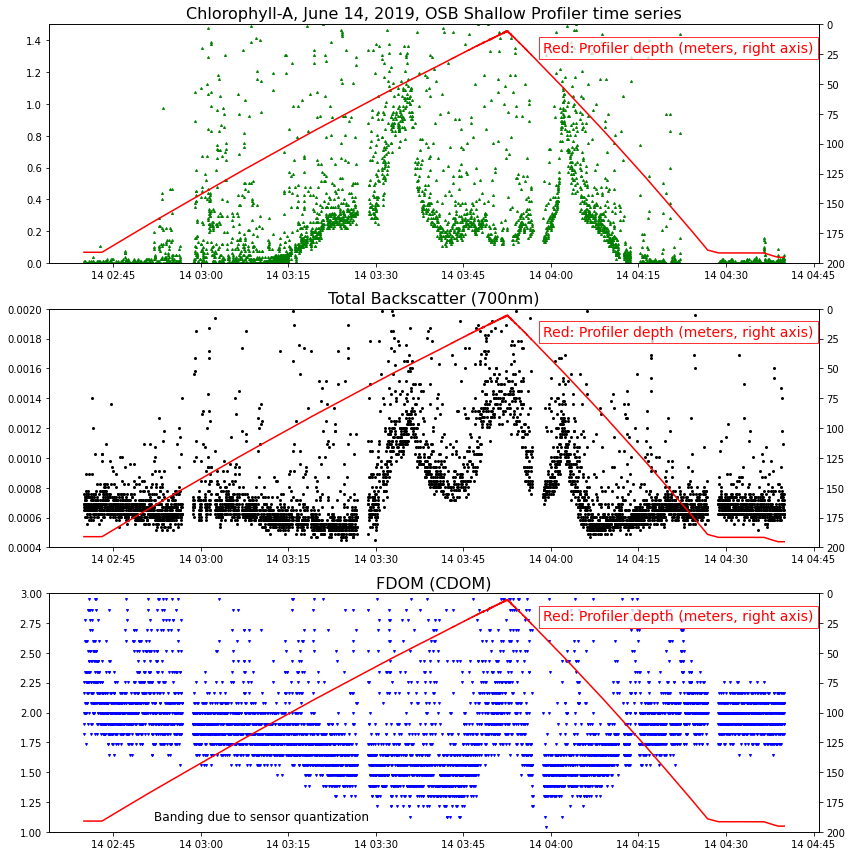

In [14]:
# Time series charts for June 14, 2019: 3 hours spanning the final profile of the deployment
#   prior to a maintenance update.

fig,axs=plt.subplots(3, figsize=(12,12), tight_layout=True)

axs[0].plot(d2019A.time, d2019A.chlora,       ms=2., marker='^', linestyle='None', color='g')
axs[1].plot(d2019B.time, d2019B.backscatter,  ms=2., marker='o', linestyle='None', color='k')
axs[2].plot(d2019C.time, d2019C.fdom,         ms=2., marker='v', linestyle='None', color='b')

axstwin = [axs[i].twinx() for i in range(3)]

for i in range(3): 
    axstwin[i].plot(d2019C.time, d2019C.depth, markersize = 4., color='red')
    axstwin[i].set(ylim = (200, 0))
    text_object = axstwin[i].text(dt64('2019-06-14 03:58:40'), 23, 'Red: Profiler depth (meters, right axis)', color='red', fontsize=14)
    text_object.set_bbox(dict(facecolor='white', alpha=0.8, edgecolor='red'))

axs[0].set(ylim=(0.0   , 1.5  ))
axs[1].set(ylim=(0.0004,  .002))
axs[2].set(ylim=(1.0   , 3.0  ))

axs[0].set_title('Chlorophyll-A, June 14, 2019, OSB Shallow Profiler time series', fontsize=16)
axs[1].set_title('Total Backscatter (700nm)', fontsize=16)
axs[2].set_title('FDOM (CDOM)', fontsize=16)

axs[2].text(dt64('2019-06-14 02:52'), 1.1, 'Banding due to sensor quantization', fontsize=12)


fig.show()

In [15]:
# Bin results by depth for comparison with discrete (cast) data

depth_bounds = [0., 15., 30., 50., 70., 90., 110., 130., 150., 170., 190., 250.]    
depth_labels = [10., 20., 40, 60., 80., 100., 120., 140., 160., 180., 200.]

# depth_bounds = np.arange(0., 217., 6.)  
# depth_labels = np.arange(3., 215., 6.)

chlora_binned      = d2019A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).mean()
backscatter_binned = d2019B.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).mean()
fdom_binned        = d2019C.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).mean()

chlora_std      = d2019A.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).std()
backscatter_std = d2019B.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).std()
fdom_std        = d2019C.sortby('depth').groupby_bins('depth', depth_bounds, labels=depth_labels).std()

#### Example of three channel comparative 


This code is deprecated in favor of isolating Chlor-A for the discrete sample comparative (see below).

```
fig,axs=plt.subplots(3, figsize=(8,15), tight_layout=True)

axs[0].errorbar(chlora_binned.chlora,           chlora_binned.depth_bins,  
                xerr=chlora_std.chlora, ecolor='k', elinewidth=1, capsize=3,
                ms=9., marker='^', linestyle='-', color='g')
axs[1].errorbar(backscatter_binned.backscatter, backscatter_binned.depth_bins, 
                xerr=backscatter_std.backscatter, ecolor='k', elinewidth=1, capsize=3,
                ms=9., marker='o', linestyle='-', color='cyan')
axs[2].errorbar(fdom_binned.fdom,               fdom_binned.depth_bins,        
                xerr=fdom_std.fdom, ecolor='k', elinewidth=1, capsize=3,
                ms=9., marker='v', linestyle='-', color='b')

axs[0].set(ylim=(220., 0.), xlim=(-10.0   , 40  ), title='Oregon Slope Base Shallow Profiler June 14, 2019 \n  Green: Chlorophyll-A, Red: Discrete Chlorophyll')
axs[1].set(ylim=(220., 0.), xlim=(-.02,  0.15), title='Cyan: Total Backscatter (700nm), Red: Beam Attenuation')
axs[2].set(ylim=(220., 0.), xlim=(0.   , 6  ), title='Blue: FDOM/CDOM, Red: Phaeopigment Concentration')

axs[0].plot(disc_chlor, disc_depth, marker='o', ms=10, color='r', linestyle='None')
axs[1].plot(ctd_atten,  ctd_depth,  marker='o', ms=10, color='r', linestyle='None')
axs[2].plot(disc_phaeo, disc_depth, marker='o', ms=10, color='r', linestyle='None')

fig.show()
```

M.Vardaro notes similarity in units; but this does not result in apples-to-apples comparisons for
CDOM or backscatter.


* FLORT-CDOM [ppb] is same units but not apples-to-apples as Discrete Phaeopigment [ug/L]
* FLORT-ChlA [ug/L] is 'apples-to-apples' with Discrete Chlorophyll [ug/L]
* FLORT-Backscatter (1/m) is related to but not apples-to-apples with Beam Attenuation (1/m)


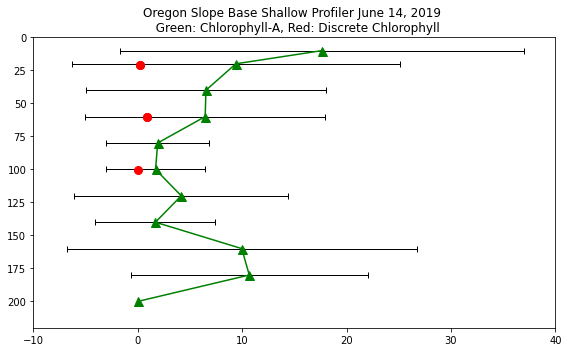

In [16]:
fig,ax=plt.subplots(figsize=(8,5), tight_layout=True)

ax.errorbar(chlora_binned.chlora,           chlora_binned.depth_bins,  
            xerr=chlora_std.chlora, ecolor='k', elinewidth=1, capsize=3,
            ms=9., marker='^', linestyle='-', color='g')

ax.set(ylim=(220., 0.), xlim=(-10.0   , 40  ), title='Oregon Slope Base Shallow Profiler June 14, 2019 \n  Green: Chlorophyll-A, Red: Discrete Chlorophyll')
ax.plot(disc_chlor, disc_depth, marker='o', ms=8, color='r', linestyle='None')
# print(disc_chlor) results in [0.0652, 0.8852, 0.9125, 0.2398, 0.2433] with two 'doubles'
fig.show()

In [17]:
df = chlora_binned.to_dataframe()
df = df.to_csv('BioOptics_Figure6_2019_06_14_chlora_binned.csv')

### Working notes for completion

* Examine Discrete Summary for possible matches further back in time for OSB, > 3 samples
* 'flag' = omit candidate NPQ data from the comparative chart
* Low pass: yes. PAR & mixed layer depth: no

# 2018 stuff 


What means this: 


    - time separation is ***FLAG*** in relation to 'last' shallow profiler run (before maintenance)
        - Shallow profiler run was 2018-06-24 02:00Z


## Concerning the 2018 dataset


The OOI Data Explorer view of OSB SP data availability is [here](https://dataexplorer.oceanobservatories.org/#metadata/104289/station/187/sensor/data?start=2018-06-24T06:56:38Z&end=2018-07-01T00:25:27Z).
From this view we have the following sequence of operational intervals:
```
JUN 24: 16:00 to JUN 24: 24:00 (about six profiles)
JUN 25: 14:00 to JUN 28: 02:00
JUN 28: 16:00 to JUN 29: 24:00
JUN 30: 11:00 to JUN 30: 13:00 (one profile)
JUL 10: 17:00 to JUL 13: 23:00
JUL 14: 05:00 to AUG 10: 21:00
```

The full-resolution dataset has a time range from JUN 24 16:50 to JUL 09 00:13 UTC. 
From July 7 or earlier the only depth variability is tidal: The profiler is parked
at about 167 meters. 


In [ ]:
#########################
#
# Profiler diagnostic view
#
#########################

# This is a diagnostic for a sequence of four profiles:

for i in [503, 504, 505, 506]: print(i, 'profile start / end:', pDf21["ascent_start"][i], \
    pDf21["descent_end"][i], '      duration: ', pDf21["descent_end"][i] - pDf21["ascent_start"][i]) 

# Results, noting the fourth one is a midnight (slow descent) profile

503 profile start / end: 2021-03-01 00:27:00 2021-03-01 02:05:00       duration:  0 days 01:38:00
504 profile start / end: 2021-03-01 02:42:00 2021-03-01 04:21:00       duration:  0 days 01:39:00
505 profile start / end: 2021-03-01 04:52:00 2021-03-01 06:31:00       duration:  0 days 01:39:00
506 profile start / end: 2021-03-01 07:22:00 2021-03-01 10:03:00       duration:  0 days 02:41:00

# Profile 506 is an hour longer in duration than the three prior. The profiler pauses during descent
# to give the pH sensor time to equilibrate. The following chart shows depth with time over 24 hours
# including slowed descents for midnight and noon.

#####################
#
# Saving a figure
#
#####################

fig.savefig(os.getcwd() + "/Images/charts/ABCOST_signals_vs_depth_and_time.png")

#####################
#
# Generate / Save / Play Back an animated chart
#
#####################

# This code (animate / playback / save) takes time to run so commented out by default
# if False: 
    # anim = animation.FuncAnimation(fig, AnimateChart, init_func=AnimateInit, \
    #                            frames=nframes, interval=200, blit=True, repeat=False)
    # play immediately: HTML(anim.to_html5_video())
    # anim.save(this_dir + '/Images/animations/multisensor_animation.mp4')
    
    
#######################################
#
# Specific to BioOptics: Generate a five-signal animation
#
#######################################


# Animated time series

site = 'osb'
year = '2021'
pDf21 = ReadProfileMetadata(os.getcwd() + "/./Profiles/" + site + year + ".csv")        

firstframe = 506        # march 1 in 2021 at OSB
nframes = 279            # 279 max for one month
ncharts = 5

fig, axs = plt.subplots(figsize=(12.5,14), tight_layout=True)

# configuration lists with seven elements each, one for each sensor
clr = ['red', 'black', 'xkcd:bronze', 'green', 'magenta']
lows = [temp_lo, salinity_lo, do_lo, chlora_lo, cdom_lo]
highs = [temp_hi, salinity_hi, do_hi, chlora_hi, cdom_hi]
lbls = ["Temperature","Salinity","Dissolved Oxygen","Chlorophyll-A","CDOM"]
offs = [1.0, 1.065, 1.130, 1.195, 1.260]
mrkrs = ['o', 's', 'D', 'v', '^']

axs.set_title('Temp, Salinity, DO, Chl-A, CDOM with Depth/Time')
axs.title.set_fontsize(22)
axs.yaxis.label.set_color('k')
axs.yaxis.label.set_fontsize(18)
axs.set_ylabel("Depth (m)")

axs.xaxis.label.set_fontsize(18)

atw = [axs.twiny() for i in range(ncharts)]      # twin y-axes supporting the multiple sensor types

# Configures all of the twin axes per the above configuration lists
for i in range(ncharts): 
    atw[i].set(xlim = (lows[i], highs[i]), ylim = (-200., 0.))
    atw[i].xaxis.label.set_fontsize(18)
    atw[i].set_xlabel(lbls[i])
    atw[i].xaxis.set_ticks_position('top')
    atw[i].spines['top'].set_position(('axes', offs[i]))
    atw[i].xaxis.label.set_color(clr[i])
    atw[i].tick_params(axis='x', colors=clr[i], size=4, width=1.5)

lines = [atw[i].plot([], [], lw=1, marker=mrkrs[i], ms = 6., c=clr[i], mfc=clr[i])[0] for i in range(ncharts)]

def AnimateInit():
    for i in range(ncharts): lines[i].set_data([], [])
    return lines

pIdcs = [i for i in range(firstframe, firstframe + nframes)]

def AnimateChart(frame):
    global pIdcs
    
    t0, t1 = pDf21['ascent_start'][pIdcs[frame]], pDf21['ascent_end'][pIdcs[frame]]

    Ts = dsT.sel(time=slice(t0, t1))
    Ss = dsS.sel(time=slice(t0, t1))
    Os = dsO.sel(time=slice(t0, t1))
    As = dsA.sel(time=slice(t0, t1))
    Cs = dsC.sel(time=slice(t0, t1))

    lines[0].set_data(Ts.temp, Ts.z)
    lines[1].set_data(Ss.salinity, Ss.z)
    lines[2].set_data(Os.doxygen, Os.z)
    lines[3].set_data(As.chlora, As.z)
    lines[4].set_data(Cs.cdom, Cs.z)

    clear_output(wait = True)
    print("animating frame", frame)
    
    return lines


##########################################################
#
# Organizational remarks across 16 datatypes (spectrophotometer not included
#
##########################################################
#
# Concerning the names of data variables
# Some engineering elements of OOI result in complex names. This commented-out code fragment demonstrates
#   opening a NetCDF file as an XArray Dataset and renaming a data variable to something simpler.
#
# dsO = xr.open_dataset("../data/data_explorer_1Min/axb/profiler/axb_profiler_doxygen_1Min.nc")
# dsO = dsO.rename_vars({"moles_of_oxygen_per_unit_mass_in_sea_water_profiler_depth_enabled":"doxygen"})
# dsO
#
# This cell formerly loaded selected datasets from the large (multi-year) data pool. This pool is 
#   external to the repository owing its large volume. This read cell is therefore now deprecated
#   in favor of subsequent cells that load smaller datasets from within the repository.
#
# To keep code compact I use the following table of abbreviations for sensors.
#   BioOptics includes Fluorometers, the main emphasis here. Fluorometers carry either two or
#   three sensor types: Chlorophyll-A, Color Dissolved Organic Matter (CDOM), and particulate backscatter. 
#   The BioOptics ensemble also includes PAR and Spectral Irradiance. PAR measurements are individual
#   values. Spectral irradiance is seven values per observation. Spectrophotometers are not considered
#   in this notebook.
#
# Dictionary of single-letter sensor keys: The capitalized letter follows 'ds', an abbreviation for
#   an XArray Dataset. We have therefore: dsA, dsB, dsC, etcetera
#
# Desig     Data                     Renamed                 Instrument        Runs during
# -----     ----                     -------                 ----------        -----------
# A         Chlorophyll-A            chlora                  fluorometer       continuous
# B         backscatter              backscatter             fluorometer       continuous
# C         CDOM                     cdom                    fluorometer       continuous
# G         pCO2                     pco2                    ?                 midnight/noon descent
# H         pH                       ph                      pH                midnight/noon descent
# I         Spectral Irradiance      ?                       spkir             continuous
# M         Reserved for Nitrate'    ?                       nitrate           midnight/noon ascent
# N         Nitrate                  ?                       nitrate           midnight/noon ascent
# P         PAR                      par                     PAR               continuous
# Q         pressure                 pressure                CTD               continuous
# O         dissolved oxygen         doxygen                 CTD               continuous
# S         salinity                 salinity                CTD               continuous
# T         temperature              temp                    CTD               continuous
# U         velocity east            veast                   xyz-current       continuous
# V         velocity north           vnorth                  xyz-current       continuous
# W         velocity up              vup                     xyz-current       continuous
#
# 
# Shallow profilers begin at rest at a depth of 200 meters. They ascend to within
#   about 10 meters of the surface, then descend to create a double profile dataset;
#   whereupon they return to the at-rest state. This cycle repeats nine times per
#   day. What follows is a simple dictionary of interval designators: The capital letter 
#   follows the sensor key
#
# A     Ascent
# D     Descent
# R     Rest
#
#
# There are three RCA shallow profiler sites with names abbreviated herein:
#
# osb           Oregon Slope Base
# axb           Axial Base
# oos           Oregon Offshore (part of the Endurance array)
#
# For more on this see the README.md file and the Notebooks subdirectory.
#
################################################################################################

####################
####################
####
#### IMPORTANT!!!!!!!!!!!
####
####    The code below loads data and ***renames*** the data variables to make them easier to work with
####
####################
####################



.......................................


# This cell can be used to glance at data availability for each type of data. It uses a 
#   very simple plot call to show presence/absence over the history of the cabled array
#   deployment. Both pCO2 and pH are 'no data' results; and upward velocity looks suspicious.
#   The other datasets look to be present during the first half of 2021.
#
# To recap the relevant part of the single-letter-designator table...
#
# Desig     Data                     Renamed                     Instrument
# -----     ----                     -------                     -----------
# G         pCO2                     pco2                        ?
# H         pH                       ph                          pH
# I         Spectral Irradiance      si412, si443, si490,        spkir
#                                    si510, si555, si620, si683   
# N         Nitrate                  nitrate                     nitrate
# P         PAR                      par                         PAR
# U         velocity east            veast                       ADCP?
# V         velocity north           vnorth                      ADCP?
# W         velocity up              vup                         ADCP?

# un-comment the next line and one of the sensor lines that follow
# fig, ax = plt.subplots(figsize=(12, 8), tight_layout=True)

# ax.plot(dsG.time, dsG.pco2,     ms = 1., color='blue', mfc='blue')    # no data
# ax.plot(dsH.time, dsH.ph,       ms = 1., color='blue', mfc='blue')    # no data
# ax.plot(dsI.time, dsI.si412,    ms = 1., color='blue', mfc='blue')    # good first half of 2021 (max 80)
# ax.plot(dsI.time, dsI.si443,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si490,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si510,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si555,    ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsI.time, dsI.si620,    ms = 1., color='blue', mfc='blue')    # "  (max down around 15)
# ax.plot(dsI.time, dsI.si683,    ms = 1., color='blue', mfc='blue')    # "  (max down around 6)
# ax.plot(dsN.time, dsN.nitrate,  ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsO.time, dsO.doxygen,  ms = 1., color='blue', mfc='blue')    # " 
# ax.plot(dsP.time, dsP.par,      ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsS.time, dsS.salinity, ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsT.time, dsT.temp,     ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsU.time, dsU.veast,    ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsV.time, dsV.vnorth,   ms = 1., color='blue', mfc='blue')    # "
# ax.plot(dsW.time, dsW.vup,      ms = 1., color='blue', mfc='blue')    # " suspiciously high amplitude in 2021

########################
#
# shear calculation code removed from BioOptics.ipynb
#
########################

# get a list of ascent indices (for dataframe pDf21, OSB 2021) for March 1, 2021
t_midnight = td64(0, 'm')
t_almost_midnight = td64(24*60-1, 'm')
list_of_ascents = GenerateTimeWindowIndices(pDf21, dt64('2021-03-01'), dt64('2021-03-02'), noon0, noon1)
print(list_of_ascents)

# attempt a shear calculation
def ShearProfile(v, offset):
    """Calculate shear from a Dataset dim=time, data vars = veast, vnorth, z"""
    # verify the time dimension
    if not v.dims['time']: return v
    len_v = v.dims['time']
    return [0. if i + offset >= len_v else                               \
         np.sqrt((vel['veast'][i]-vel['veast'][i + offset])**2 +         \
                 (vel['vnorth'][i]-vel['vnorth'][i + offset])**2)        \
         for i in range(len_v)]

i=0
offset=2
veast  = dsU.sel(time=slice(pDf21['ascent_start'][list_of_ascents[i]], pDf21['ascent_end'][list_of_ascents[i]]))
vnorth = dsV.sel(time=slice(pDf21['ascent_start'][list_of_ascents[i]], pDf21['ascent_end'][list_of_ascents[i]]))
vel    = xr.merge([veast, vnorth])
shear = ShearProfile(vel, offset)

fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
axs.plot(shear, vel.z, marker='.', ms=9., color='k', mfc='r')
axs.set(ylim = (-200., 0.), title='--------------')

# Some additional poking around code...

# fig, axs = plt.subplots(figsize=(12,4), tight_layout=True)
# axs.plot(vel.time, vel.z, marker='.', ms=9., color='k', mfc='r')
# axs.set(ylim = (-200., 0.), title='Depth versus time: Ascent per velocity sensor')

# vel.var

